# In-Class Assignment: Reviewing Pandas and exploring data
# Day 5 
# CMSE 202

### <p style="text-align: right;"> &#9989; Gunnar Austin</p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

<img src="https://miro.medium.com/max/819/1*Dss7A8Z-M4x8LD9ccgw7pQ.png" width="500px">

## Goals for today's In-class assignment 

1. Make sure that everyone remembers how to do the basics with Pandas.
2. Do a little data analysis with some existing data sets.
3. Make some simple visualizations of the data.

### Assignment instructions

Work through the notebook making sure to write all necessary code and answer any questions.

**This assignment is due by the end of class,** and should be uploaded into the appropriate "In-Class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

## Agenda for today:

1. [Review of pre-class assignment](#review)
2. [Loading and exploring a dataset](#loading)
3. [Visualizing your data](#visualizing)

### Useful imports (make sure to execute this cell!)
Let's get a few of our imports out of the way. If you find others you need to add, consider coming back and putting them here.

In [1]:
# necessary imports for this notebook
import pandas as pd
from pandas.plotting import scatter_matrix

----
<a id="review"></a>
## 1. Review of pre-class assignment

Did anyone have any specific issues with the pre-class assignment?

Let's take a moment to highlight some key concepts. **Discuss with your table** the following prompts and write down a brief definition of each of these concepts.

**If you don't feel like you have good working definitions yet, try doing a quick internet search to see if you can find a definition that makes sense to you.**

&#9989; **Question 1:** What are the features of a Pandas Series?

<font size=+3>&#9998;</font> A Pandas Series is like a single column of data with indecies that make it easy to look up and organize values. It supports fast math and stats across all its values at once, like sums or averages, without writing loops. It also plays well with missing data and aligns automatically with other Series by their labels, so combining data is simple.


&#9989; **Question 2:** What are the differences between a DataFrame and a Series?

<font size=+3>&#9998;</font> A Pandas Series is a one-dimensional column of data with labels, while a DataFrame is like a full table made up of many Series side by side. A Series holds just one set of values, but a DataFrame can hold multiple columns, each possibly with different data types. In short, a Series is like a single Excel column, and a DataFrame is like the whole spreadsheet.


---
<a id="loading"></a>
## 2. Loading and exploring a dataset

Though you review how one can build a DataFrame by hand in your pre-class assignment, the goal is typically to read some sort of preexisting data **into** a DataFrame so we can work with it. 

Pandas is pretty flexible about reading in data and can read in a [variety of formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). However, it sometimes needs a little help. Let's start with a "toy" dataset, the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set"> Iris Data set </a>. 

A toy dataset is often one that has a particularly nice set of features or is of a manageable size such that it can be used as a good dataset for learning new data analysis techiques or testing out code. This allows one to focus on the code and data science methods without getting too caught up in wrangling the data. However, **data wrangling** is an authentic part of doing any sort of meaningful data analysis as data more often messier than not. 

Although you will be working with a toy dataset today, you may still have to do a bit of wrangling along the way.

### 2.1 Getting used to looking for useful information on the internet

Another authentic part of working as a computational professional is getting comfortable with searching for help on the internet when you get stuck or run into something that is unfamiliar to you. The Python data analysis/computional modeling world can be complicated and is ever-evolving. There is also a large number of publicly available toolsets with varying levels of complexity and nuance. Through practice and experience, we become better computational folks by learning how to search for better, more efficient, clearer ways to do things. 

#### The Iris data

The iris data set is pretty straight forward (review the wikipedia link above if you haven't yet), especially if someone has done all of the data wrangling and cleaning for you. To make it a little more interesting we provide it in a raw form that you might encounter with other data.

**&#9989; Do This:**  To get started, **you'll need to download the following two files**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/iris.data`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/iris.names`

Once you've done so, you should have access to the following : `iris.data` and `iris.names`. Open them both and discuss what you see. This is a good opportunity to use you favorite text editor or use something new. Feel free to ask your group members or instructors what they prefer to use.

&#9989; **Question 3**: Describe the data and the information in the names file. What characteristics are provided there? Perhaps the iris dataset link above will help.

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text). **Practice using appropriate Markdown formating to make your answer's easy to read.**

###  2.2 Reading in a file

Pandas supports a number of file formats, but one of the most common is the one provided by the `read_csv` function. Typically, the phrase **csv** stands for "comma separated values", a text file format that excel and other spread sheets use. In a typical csv file, each line represents a line in a spreadsheet and each cell value is separated from the next by a comma.

However, you can use other separators as well. Look at the [documentation for `read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

**&#9989; Do This:** Read the ```iris.data``` file into your notebook **and assign appropriate column headers**. Display the DataFrame to make sure it looks reasonable.

In [18]:
# replace this cell with code to read in the iris.data file with column headers. Use appropriate headers!
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv("iris.data.csv", delim_whitespace=True, header=None, names=col_names)
df.head()

C:\Users\gunna\AppData\Local\Temp\ipykernel_32388\2044609850.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("iris.data.csv", delim_whitespace=True, header=None, names=col_names)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2.3 Describing your data

The `.describe()` methods tells you about the data. If the data is too big to see (height and width) you can use the two options below to show more of the data. You can change the values to suit your needs. 

In [3]:
# expand what is shown (rows and cols) by pandas, any time you change default options -- be thoughtful about your choices!
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

**&#9989; Do This:** Run the `.describe()` method on the data you read in. If you think about how you might **classify** the species contained in the dataset based on the four available features, can you discern anything helpful? Put your answer in the cell below.

In [6]:
# Put your code here
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<font size=+3>&#9998;</font> Sepal measurements tend not deviate from the mean too much. While the petal standard deviation is over a centimeter

### 2.4 Grouping your data
You can perform operations to group elements using the `.groupby()` method. The result of the use of `.groupby` is a `GroupBy` object. If you were to print it you see only the class instance name as nothing is computed until an operation is performed on the groups, much like other iterators. However, you can use `.describe()` on the result of a `.groupby()` call. If you haven't used this before, you may need to consult the [documentation for `.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) 

**&#9989; Do This:** Make a GroupBy object using the iris DataFrame and **group by the class/species of the data**. Then run `.describe()` on the group result. Now take a look at the data from the group. Thinking again about classification, **do you see any data features you could use to classify the data when you look at it this way?**

In [21]:
# Put your code here
group = df.groupby("class")
group.describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width                                                \
                      count   mean       std  min    25%  50%    75%  max   
class                                                                       
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                petal_length                                               \
                       count   mean       std  min  25%   50%    75%  max   
class                                                                       
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal_width                                            
                      count   mean       std  min  25%  50%  75%  max  
class                                                                  
Iris-setosa            50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

<font size=+3>&#9998;</font> .groupby shows that setosa is the smallest and virginica is the larget

-----
<a id="visualizing"></a>
## 3 Visualizing your data

We are often limited in understanding our data because it is complex, has many features, or is quite large. In these situations, visualizations (plots, charts, and graphs) can help represent our data in ways that help us gain greater insight into the trends, features, and classes we want to understand.

### 3.1 Making a scatter matrix

Rather than just looking at the raw values or exploring basic statistical values for our data, it would be better if we were to visualize the differences. Since the number of features is small, we can use a plotting feature of Pandas called `scatter_matrix()`. Did you notice that we imported `scatter_matrix` at the start of this notebook?

**&#9989; Do This:** Try calling the `scatter_matrix` function on your dataframe. Use a `marker` that you prefer. Look up the documentation for `scatter_matrix` on the Pandas website for more information! You may need to make the figure bigger to get a good look at it.

**Note**: There is a similar sort of plot that can be made with the [seaborn](https://seaborn.pydata.org/index.html) package, which you may have seen before. If so, do you remember what it is?

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

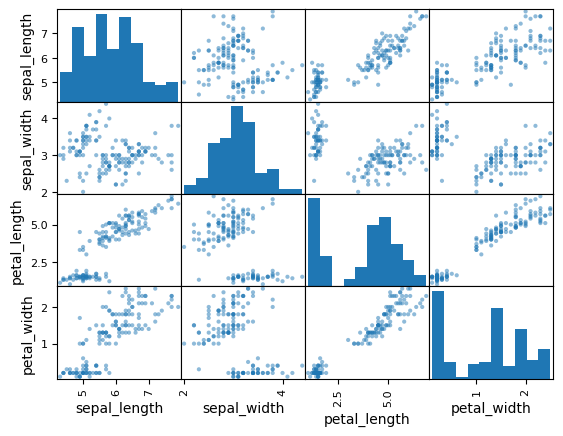

In [24]:
# your code here
scatter_matrix(df)

&#9989; **Question 4**: Does this visualization help you to determine the features that might be useful for classification? Why or why not?

<font size=+3>&#9998;</font> Oh yeah. I can understand all of this now

### 3.2 Color coding your data

The default scatter matrix probably isn't as helpful as we might hope as it's impossible to tell which points on the plot represent our classes/sepcies.

We could really use a separate color indication for each dot so we can tell the species apart. Essentially, we need to create an array such that, for each observation in the DataFrame, we can assign a color value to associate it with the appropriate species. It could be just an integer, or it could be one of the standard colors such as "red".

**&#9989; Do This:** Create a new list, array, or Pandas Series object that maps each species to a particular color. Then recreate the scatter matrix using the `c` argument to give the points in the plot different colors.

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

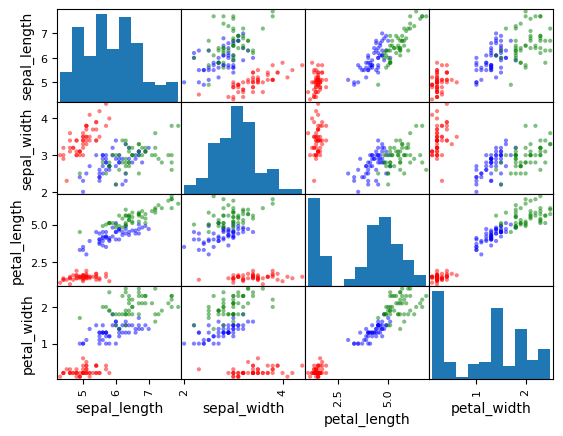

In [34]:
# Put your code here
color_map = {"Iris-setosa": "r", "Iris-versicolor": "b", "Iris-virginica": "g"}
color_df = df["class"].map(color_map)
scatter_matrix(df.iloc[:, :-1], c=color_df)

Hope you got something that's a little more useful! OK, how do we read this now?
* The diagonal shows the distribution of the four  numeric variables of our example data.
* In the other cells of the plot matrix, we have the scatterplots (i.e. correlation plot) of each variable combination of our dataframe. 

&#9989; **Question 5**: Are you better able to discern features that might be useful in classfying irises? What can you say about the features of each iris species? Can you separate one species easily? If so, using which feature(s)?

<font size=+3>&#9998;</font> Yes it is much easier to classify which data belongs to which species. They are genera;;y grouped around the same standard deviations, as in the small ones generally stay small and the bigger species is generally always bigger

### 3.3 Separating species of irises

Now we will use the feature(s) you found above to try to separate iris species. In future parts of the course, we may explore how to do this using models, but for now, you will try to do this by slicing the DataFrame.

**&#9989; Do This:** One of these species is obviously easier to separate than the others. Can you use a Boolean mask on the dataframe and isolate that one species **using the features and *not the species label***? Try to do so below and confirm that you were successful.

In [40]:
# Put your code here
setosa_mask = df["petal_length"] < 2.5
iris_setosa = df[setosa_mask]
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**&#9989; Do This:** Can you write a sequence of Boolean masks that separate the other two as well? Are these as effective as the first? Can you think of anything you might do to improve the separation?

In [44]:
# Put your code here
virginica_mask = df["petal_width"] > 1.7
iris_virginica = df[virginica_mask]
print(iris_virginica)

versicolor_mask = (0.9 < df["petal_width"]) & (df["petal_width"]< 1.7)
iris_versicolor = df[versicolor_mask]
print(iris_versicolor)

     sepal_length  sepal_width  petal_length  petal_width            class
70            5.9          3.2           4.8          1.8  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica
101           5.8          2.7           5.1          1.9   Iris-virginica
102           7.1          3.0           5.9          2.1   Iris-virginica
103           6.3          2.9           5.6          1.8   Iris-virginica
104           6.5          3.0           5.8          2.2   Iris-virginica
105           7.6          3.0           6.6          2.1   Iris-virginica
107           7.3          2.9           6.3          1.8   Iris-virginica
108           6.7          2.5           5.8          1.8   Iris-virginica
109           7.2          3.6           6.1          2.5   Iris-virginica
110           6.5          3.2           5.1          2.0   Iris-virginica
111           6.4          2.7           5.3          1.9   Iris-virginica
112           6.8        

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer. How effective your Boolean mask separation of the 3 species? Any ideas for improvements?

---
## 4 What if we didn't have Pandas to read in this data?

While Pandas makes life pretty easy for reading in csv and other file formats, all of this functionality is built on top of the standard Python capability. Python can natively open and read files lines by line, but working with files in this context might not be something you're familiar with. For this part of the assignment, you're going to explore how you can use **just Python** without any special packages to read in the iris data.

### 4.1 Code review: Loading the iris data with basic Python

**&#9989; Do This:**  To get started, **you'll need to download the following file**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/code_samples/my_pandas.py`

**&#9989; Do This:** Once you have the file downloaded and in the same location as this notebook **open the file and read through it carefully**. As you read the file **add comments to the lines marked with `#` to explain what you understand the code to be doing**. 

There may be bits of Python code that you've not encounted before so make sure to **talk with your group** and **search for information on the internet** as you try to make sense of the code!

Jot down some of the things you learned or struggled you had in the cell below.

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and make note of anything new you learned from reading through the code or highlight anything you don't feel like you understand.

### 4.2 Using the code: importing the functions and reading in the data

Now that you have the hand-made functions for reading in the iris data, we're going to practice **importing functions from script and then using them in your notebook**.

The technique for doing this is the following:

``` python
from [PACKAGENAME] import [FUNCTION]
```
Where "PACKAGENAME" is the name of the script but without the ".py" part. So for `my_pandas.py`, the PACKAGENAME would be `my_pandas`. Then the FUNCTION is the name of the function from the script that you want to import, e.g. `my_pandas_idx`.

**We'll using this functionality in future assignments, so make sure you feel comfortable with this idea.**

**&#9989; Do This:** Import the `my_pandas` function and the `my_pandas_idx` function (you can do this on one line, check to see if anyone one in your group knows how). Then, **use these two functions to first read in the data and then extract just the second column from the data**.

Once you've done this, **print the first three rows of the iris data and all of the second column.**

In [55]:
# Put your code here
from my_pandas import my_pandas
from my_pandas import my_pandas_idx

new = my_pandas("iris.data.csv")
my_pandas_idx(new, 3)

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.3,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.1,
 0.1,
 0.2,
 0.4,
 0.4,
 0.3,
 0.3,
 0.3,
 0.2,
 0.4,
 0.2,
 0.5,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.1,
 0.2,
 0.1,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.2,
 0.6,
 0.4,
 0.3,
 0.2,
 0.2,
 0.2,
 0.2,
 1.4,
 1.5,
 1.5,
 1.3,
 1.5,
 1.3,
 1.6,
 1.0,
 1.3,
 1.4,
 1.0,
 1.5,
 1.0,
 1.4,
 1.3,
 1.4,
 1.5,
 1.0,
 1.5,
 1.1,
 1.8,
 1.3,
 1.5,
 1.2,
 1.3,
 1.4,
 1.4,
 1.7,
 1.5,
 1.0,
 1.1,
 1.0,
 1.2,
 1.6,
 1.5,
 1.6,
 1.5,
 1.3,
 1.3,
 1.3,
 1.2,
 1.4,
 1.2,
 1.0,
 1.3,
 1.2,
 1.3,
 1.3,
 1.1,
 1.3,
 2.5,
 1.9,
 2.1,
 1.8,
 2.2,
 2.1,
 1.7,
 1.8,
 1.8,
 2.5,
 2.0,
 1.9,
 2.1,
 2.0,
 2.4,
 2.3,
 1.8,
 2.2,
 2.3,
 1.5,
 2.3,
 2.0,
 2.0,
 1.8,
 2.1,
 1.8,
 1.8,
 1.8,
 2.1,
 1.6,
 1.9,
 2.0,
 2.2,
 1.5,
 1.4,
 2.3,
 2.4,
 1.8,
 1.8,
 2.1,
 2.4,
 2.3,
 1.9,
 2.3,
 2.5,
 2.3,
 1.9,
 2.0,
 2.3,
 1.8]

---
<a id="generative"></a>
## 5. Experimenting with generative AI

In this part of the assignment we're going to revisit using generative AI tools. Try using the course AI tool HiTA and see if you can develop code to perform the separation of the IRIS plant species better than your method above. 

Basically, see if you can prompt the large language model (LLM) to develop code that will take the first four columns of the Iris dataset and predict the species.  

<font color="red">**Important note**</font>: Don't forget to include comments in your code or in a markdown cell citing that you used HiTA (or another tool) to help you write the code. You should also make sure to include the prompt you used to get to your final code.

**Note:** This is intended to test the limits of current LLMs.  You may or may not succeed in coaxing an LLM to generate a useful algorithm. 

In [ ]:
# Put your AI-assisted species identification code here
# Make sure to cite the tool you use and the key prompt you used to get to things working


# Example Citation:
# Code adapted from: 
# OpenAI. (2023). ChatGPT-3.5. Accessed from https://chat.openai.com/ on Sept 7, 2023. 
# Prompt chain:{'write python code to take first 4 columns of iris data set and predict the species of the flower'; 'do this only with threshold operations'; 'avoid using machine learned classifier'}


---
### &#128721; You made it to the end!
Is there anything that we covered today that you're still not feeling certain about? Talk to your group or check in with an instructor.

---

---------
### Congratulations, you're done with your in-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's in-class assignment submission folder. (Don't forget to add all of the appropriate names in the first cell).

&#169; Copyright 2025,  Department of Computational Mathematcs, Science and Engineering at Michigan State University